<a href="https://colab.research.google.com/github/Yash-Pandey007/Wallmart_Sales/blob/main/Walmart_Salesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [209]:
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1PvpVvgNb0gdtNpOOJiac7rHcQD3fanhIgcaF_QfVgR8')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get())
# Code for making the first row as header. Remove if not needed.
df.columns = df.iloc[0]
df = df.drop(0)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106
2,1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106
3,1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106
4,1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106
5,1,05-03-2010,1554806.68,0,46.5,2.625,211.3501429,8.106


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 1 to 6435
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Store         6435 non-null   object
 1   Date          6435 non-null   object
 2   Weekly_Sales  6435 non-null   object
 3   Holiday_Flag  6435 non-null   object
 4   Temperature   6435 non-null   object
 5   Fuel_Price    6435 non-null   object
 6   CPI           6435 non-null   object
 7   Unemployment  6435 non-null   object
dtypes: object(8)
memory usage: 402.3+ KB


In [211]:
n_df = pd.DataFrame()

In [212]:
for i in df.columns:
  n_df[i] = pd.to_numeric(df[i], errors='coerce')

In [213]:
n_df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

In [214]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 1 to 6435
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [215]:
n_df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


<Axes: xlabel='Weekly_Sales', ylabel='Count'>

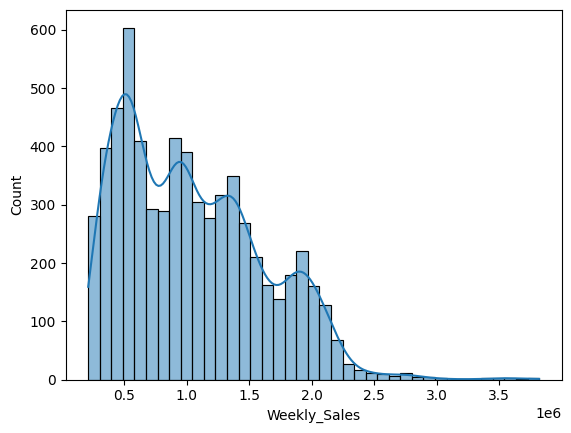

In [216]:
sns.histplot(n_df["Weekly_Sales"],kde=True)

<Axes: ylabel='Weekly_Sales'>

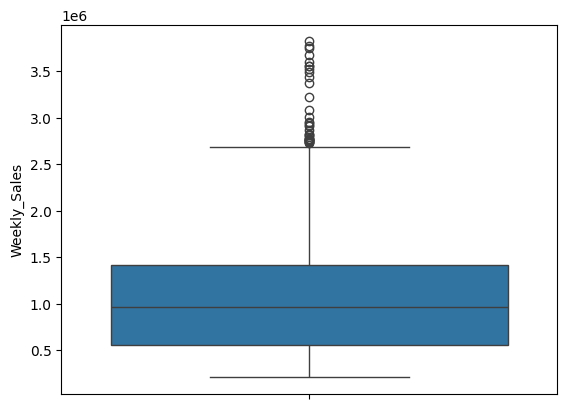

In [217]:
sns.boxplot(n_df["Weekly_Sales"])

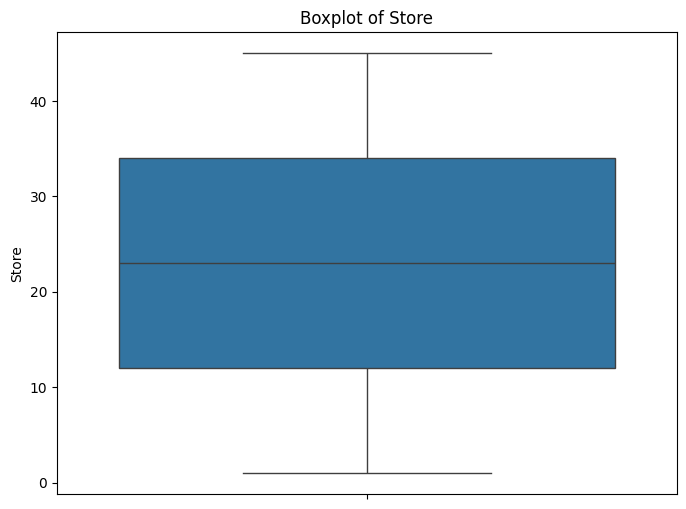

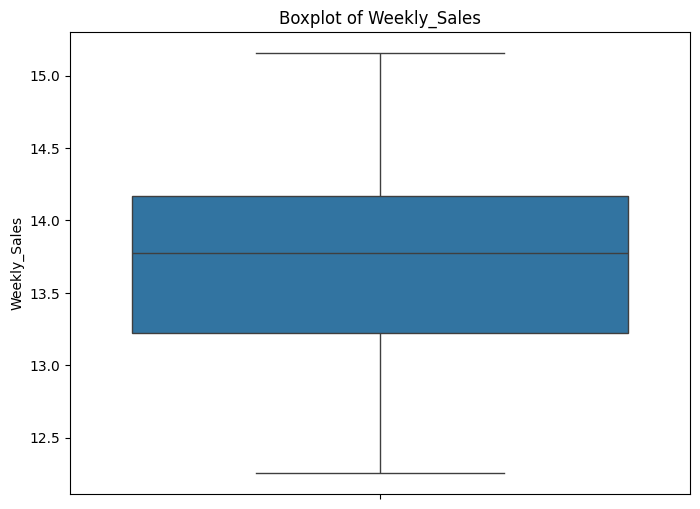

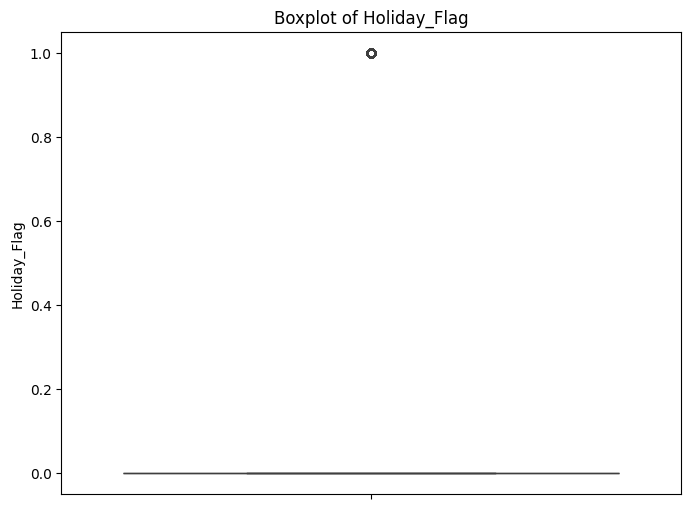

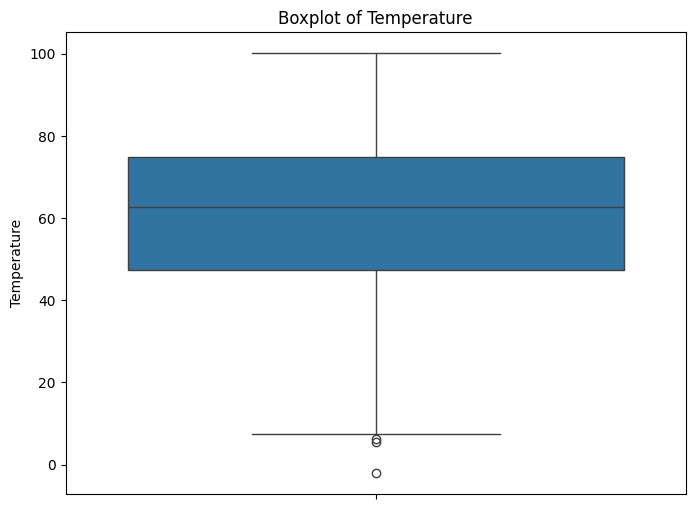

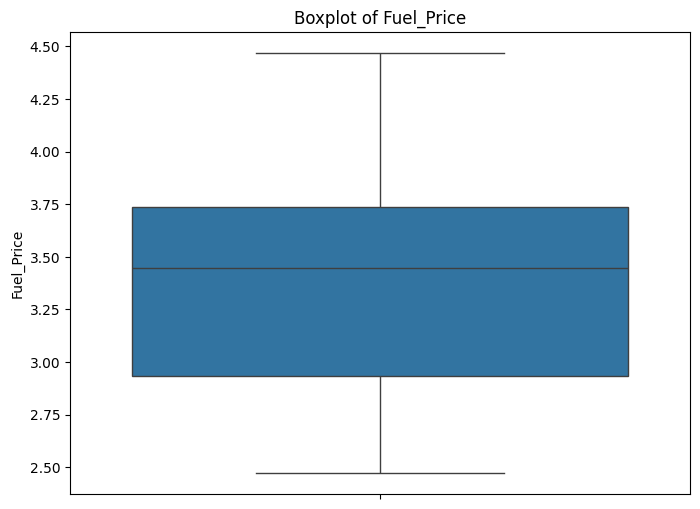

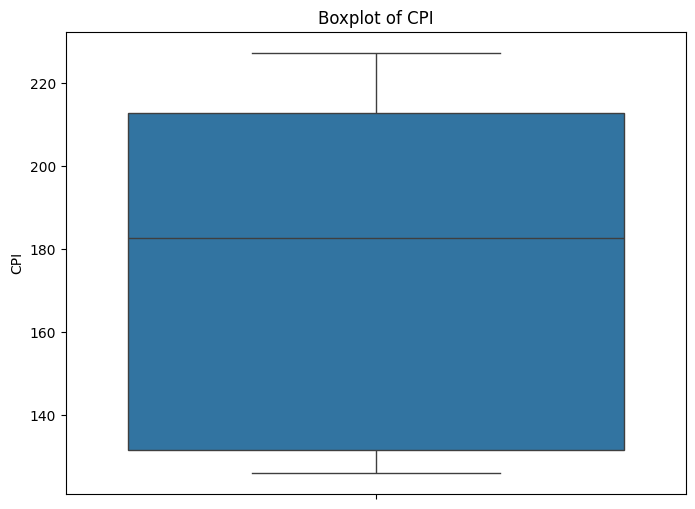

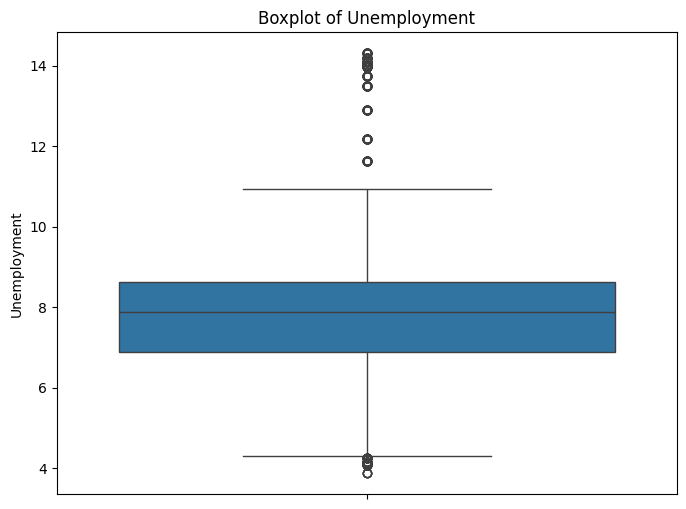

In [233]:
for col in n_df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(n_df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [219]:
from sklearn.preprocessing import FunctionTransformer
transform = FunctionTransformer(func=np.log1p)
n_df['Weekly_Sales'] = transform.fit_transform(n_df["Weekly_Sales"])

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

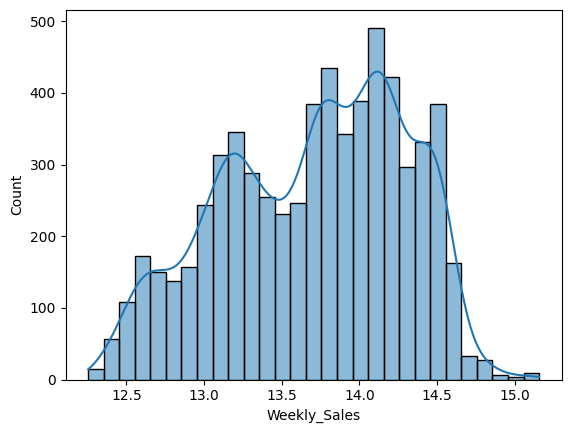

In [220]:
sns.histplot(n_df["Weekly_Sales"],kde=True)

<Axes: ylabel='Weekly_Sales'>

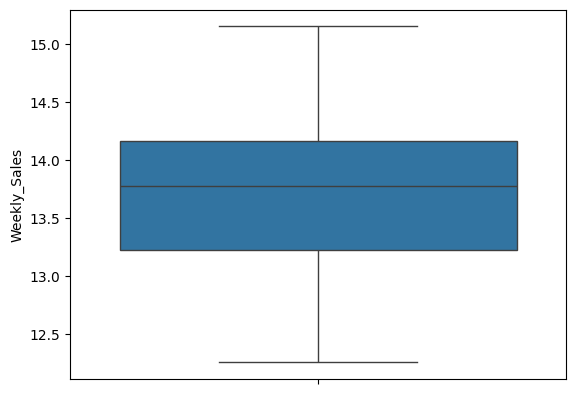

In [221]:
sns.boxplot(n_df["Weekly_Sales"])

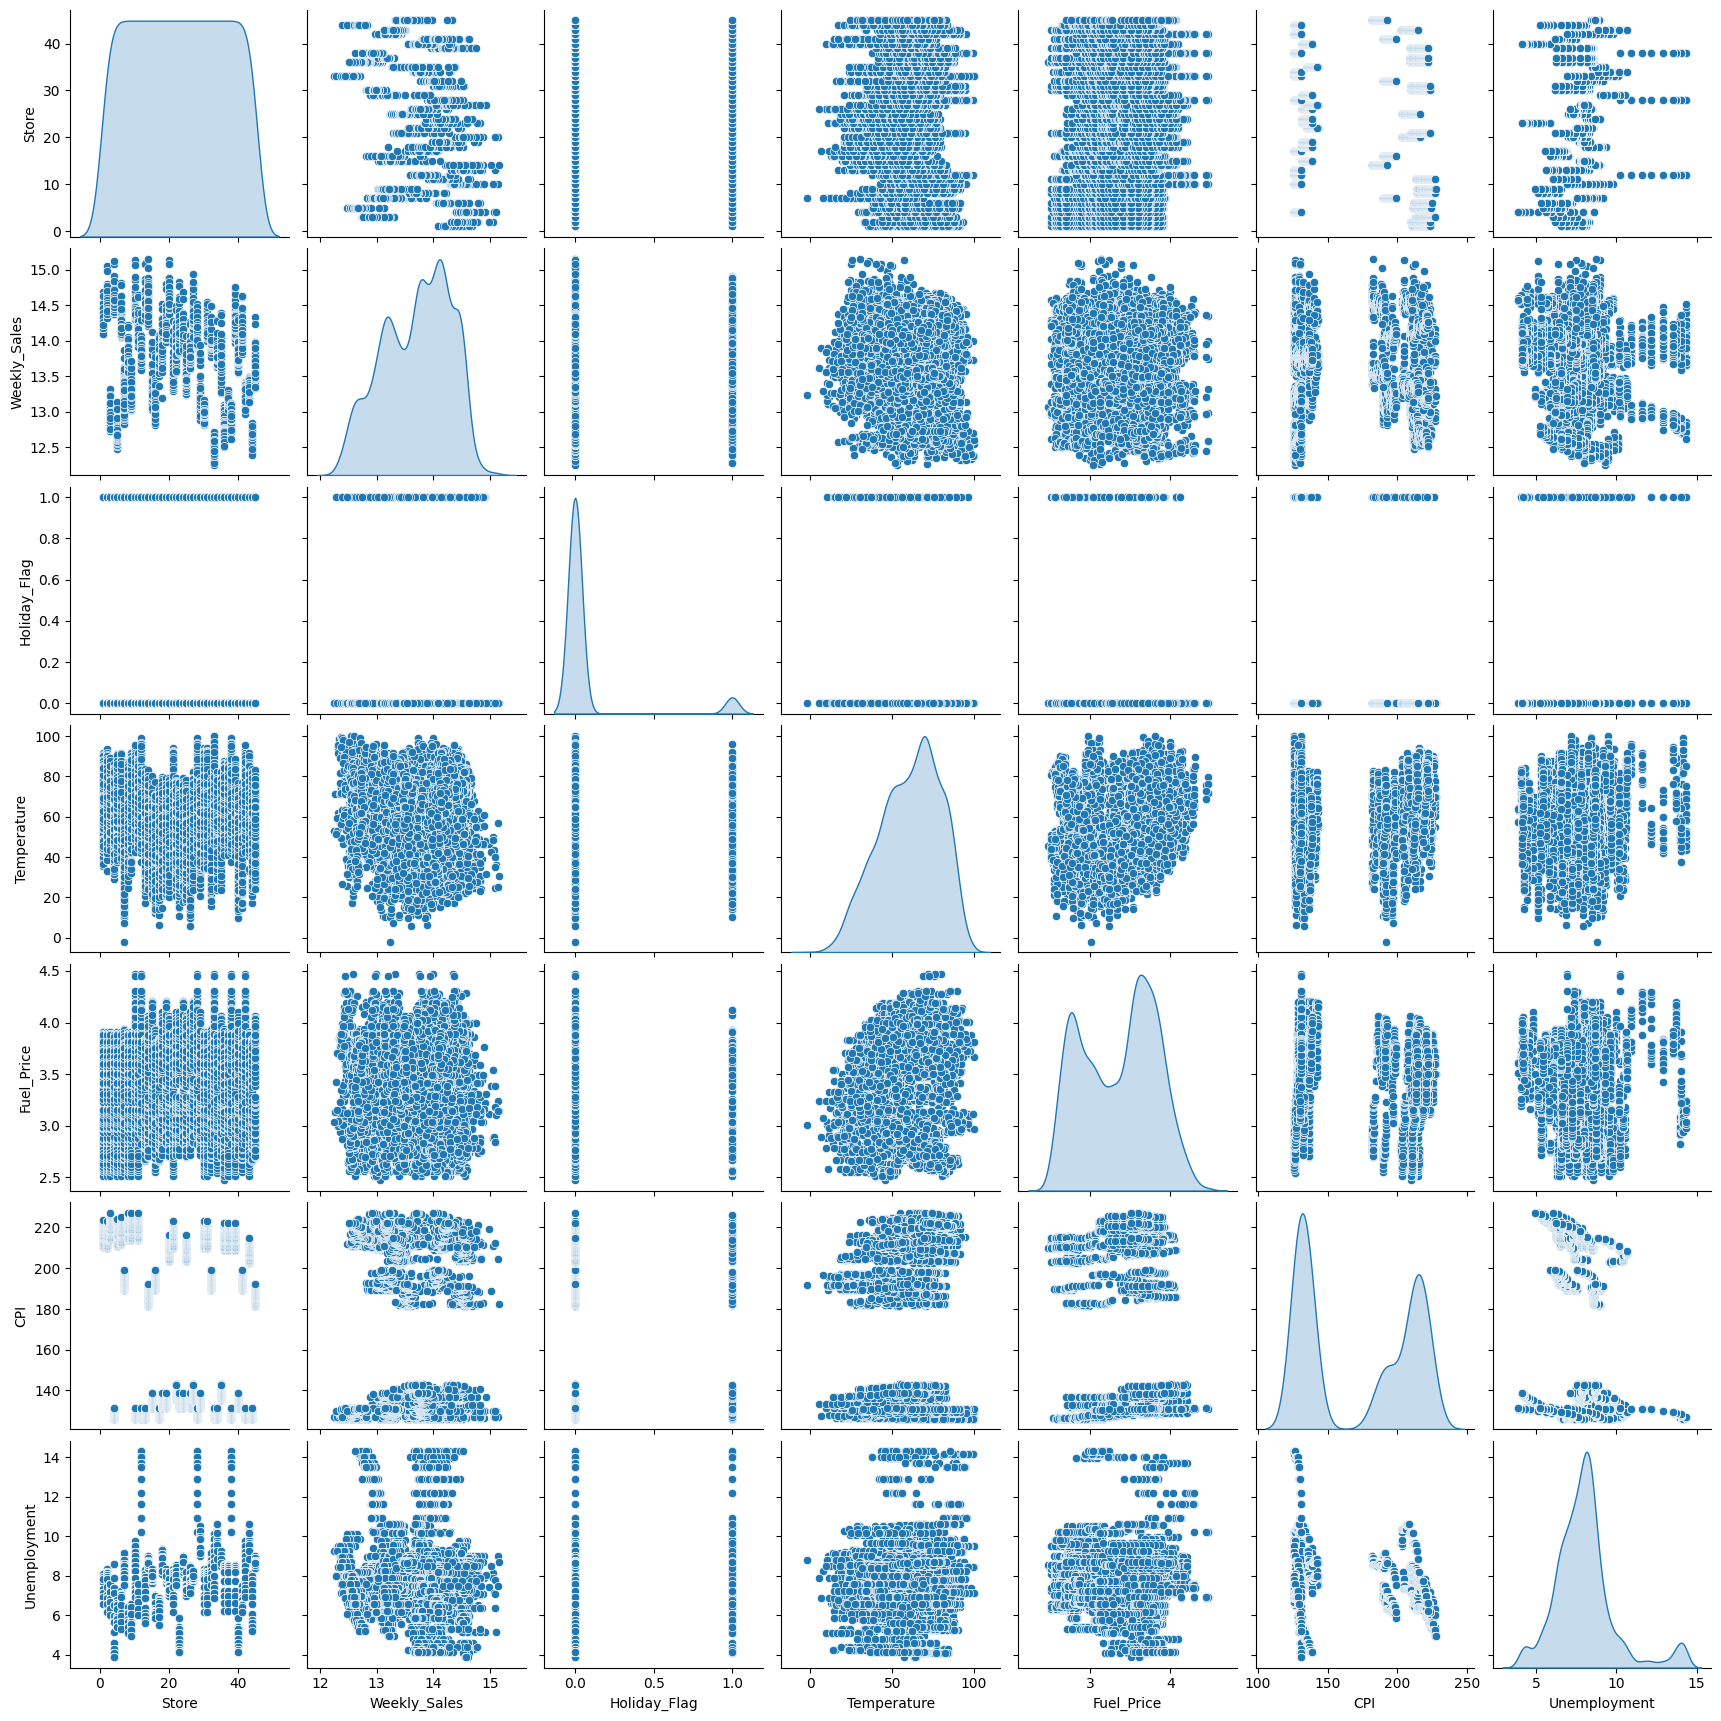

In [222]:
sns.pairplot(n_df,diag_kind="kde")

In [223]:
x = n_df.drop(["Weekly_Sales","Date"],axis=1)
y = n_df["Weekly_Sales"]

In [224]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [225]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [226]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 Score:  0.12551934350373162
MSE:  0.3082951792385453


In [227]:
from sklearn.preprocessing import PolynomialFeatures

In [228]:
# from sklearn.linear_model import LinearRegression
# # Create polynomial features
# for i in range(1,10):
#   print("Degree: ",i)
#   poly = PolynomialFeatures(degree=i)  # Specify the degree of the polynomial
#   x_train_poly = poly.fit_transform(x_train)
#   x_test_poly = poly.transform(x_test)

#   # Initialize and fit the Linear Regression model
#   lr = LinearRegression()
#   lr.fit(x_train_poly, y_train)

#   # Make predictions
#   y_pred = lr.predict(x_test_poly)

#   # Print evaluation metrics
#   print("R2 Score: ", r2_score(y_test, y_pred))
#   print("MSE: ", mean_squared_error(y_test, y_pred))

In [229]:
poly = PolynomialFeatures(degree=7)  # Specify the degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# Make predictions
y_pred = lr.predict(x_test_poly)

# Print evaluation metrics
print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.5988644208155758
MSE:  0.14141898321583685


In [230]:
# from sklearn.ensemble import RandomForestRegressor
# for i in range(10,100,10):
#   print("Estimators: ",i)
#   rf = RandomForestRegressor(n_estimators=i)
#   rf.fit(x_train,y_train)
#   y_pred = rf.predict(x_test)
#   print("R2 Score: ",r2_score(y_test,y_pred))
#   print("MSE: ",mean_squared_error(y_test,y_pred))

In [231]:
from xgboost import XGBRegressor
# for i in range(15):
#   print("Max Depth: ",i)
#   xgb = XGBRegressor(max_depth=i)
#   xgb.fit(x_train,y_train)
#   y_pred = xgb.predict(x_test)
#   print("R2 Score: ",r2_score(y_test,y_pred))
#   print("MSE: ",mean_squared_error(y_test,y_pred))

In [232]:
xgb = XGBRegressor(max_depth=7)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 Score:  0.9774892846463973
MSE:  0.007936076084899001
